## 1) Importing All Modules

In [1]:

import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage,misc
from PIL import Image
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d







### Reading the Image Using the Pillow and Converting it to GreyScale

In [2]:
Building = Image.open('SanFrancisco.jpg').convert('L')
Building=np.array(Building)
print(Building.shape)


(168, 300)


### We Now Apply Gaussian Blurring Filter with a 5X5 kernel , followed by a Laplacian Filter for Edge Detection .

### to Demonstrate how the filters are use . We use the convole2d function , which takes the Gaussian applied blurr image, and then colves with Laplacian filter which we defined. 

In [8]:
Gaussian =gaussian_filter(Building, sigma=3)


laplacianFilter=np.array([[-1,-1,-1], [-1, 8, -1], [-1, -1, -1]])
LOG_Filter=convolve2d(Gaussian, laplacianFilter, "same", "symm")

### Now we will also Apply Laplacian Filter without Gaussian Filter

In [9]:

Laplacian_Filter=convolve2d(Gaussian, laplacianFilter, "same", "symm")

### We will Define Sobel Opperator for for X Derivative , Y Derivate , and XY Derivative


In [10]:
SobelX=np.array([[-1,0,1], [-2, 0, 2], [-1, 0, 1]])
SobelY=np.array([[-1,-2,-1], [0, 0, 0], [1, 1, 1]])

In [11]:
sobelx = convolve2d(Building, SobelX, "same", "symm")
sobely = convolve2d(Building, SobelY, "same", "symm")
sobelxy = np.hypot(sobelx, sobely)
sobelxy *= 255.0 / np.max(sobelxy)  # normalize (Q&D)
sobelxy=sobelxy.astype(int)


### Visualization of All filters Defined Above 

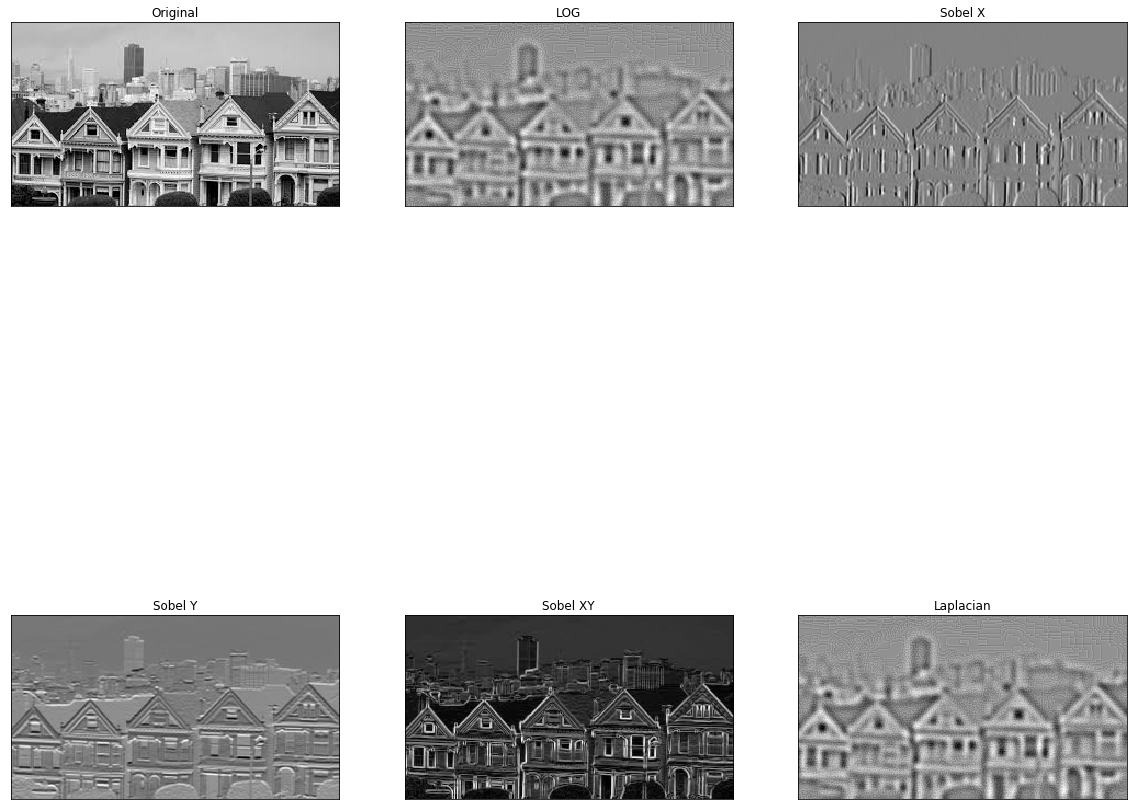

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20
plt.subplot(2,3,1),plt.imshow(Building,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(LOG_Filter,cmap = 'gray')
plt.title('LOG'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(sobelxy,cmap = 'gray')
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(Laplacian_Filter,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])


plt.show()
